In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
import git
import sys
import os
import time
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader
from argoverse.visualization.visualize_sequences import viz_sequence
from argoverse.map_representation.map_api import ArgoverseMap

repo = git.Repo('.', search_parent_directories=True)
BASE_DIR = repo.working_tree_dir
sys.path.append(BASE_DIR)

import model.datasets.argoverse.dataset as dataset
import model.datasets.argoverse.dataset_utils as dataset_utils 
import model.datasets.argoverse.map_functions as map_functions

# Set root_dir to the correct path to your dataset folder

split_name = "train"
root_dir = os.path.join(BASE_DIR,f'data/datasets/argoverse/motion-forecasting/{split_name}/data/')

avm = ArgoverseMap()
afl = ArgoverseForecastingLoader(root_dir)

print('Total number of sequences:',len(afl))

Total number of sequences: 205942


In [3]:
files, num_files = dataset_utils.load_list_from_folder(root_dir)

file_id_list = []
root_file_name = None
for file_name in files:
    if not root_file_name:
        root_file_name = os.path.dirname(os.path.abspath(file_name))
    file_id = int(os.path.normpath(file_name).split('/')[-1].split('.')[0])
    file_id_list.append(file_id)
file_id_list.sort()
print("Num files: ", num_files)

Num files:  205942


dfs_threshold_front, dfs_threshold_back:  139.5 84.0
Time consumed:  0.3514101505279541


/home/denso/anaconda3/envs/carlos_vsr_mapfe4mp/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


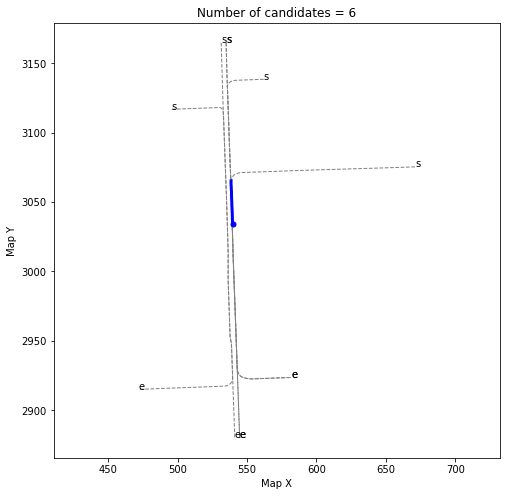

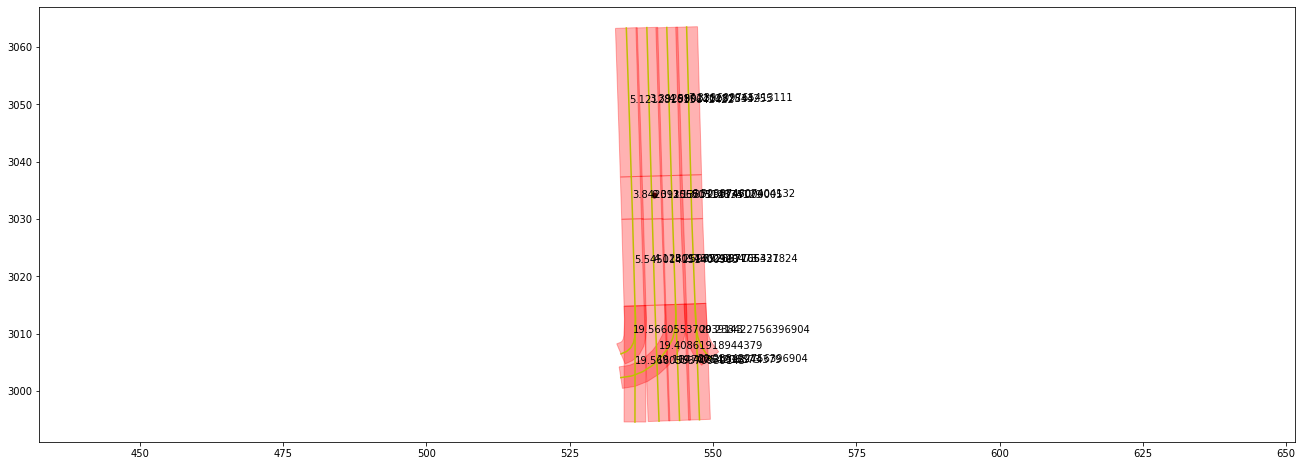

(<argoverse.map_representation.lane_segment.LaneSegment at 0x7faa74c57160>,
 0.9217889937025174,
 array([[ 539.20438782, 3037.47682371],
        [ 539.20874245, 3037.32423547],
        [ 539.21309707, 3037.17164723],
        [ 539.2174517 , 3037.019059  ],
        [ 539.22180632, 3036.86647076],
        [ 539.22616095, 3036.71388252],
        [ 539.23051557, 3036.56129428],
        [ 539.23487019, 3036.40870604],
        [ 539.23922482, 3036.2561178 ],
        [ 539.24357944, 3036.10352956],
        [ 539.24793407, 3035.95094132],
        [ 539.25228869, 3035.79835308],
        [ 539.25664332, 3035.64576484],
        [ 539.26099794, 3035.49317661],
        [ 539.26535256, 3035.34058837],
        [ 539.26970719, 3035.18800013],
        [ 539.27406181, 3035.03541189],
        [ 539.27841644, 3034.88282365],
        [ 539.28277106, 3034.73023541],
        [ 539.28712569, 3034.57764717],
        [ 539.29148031, 3034.42505893],
        [ 539.29583493, 3034.27247069],
        [ 539.30018956,

In [43]:
split_name = "train"
seq_id = 86
seq_path = f"{BASE_DIR}/data/datasets/argoverse/motion-forecasting/{split_name}/data/{seq_id}.csv"
df = pd.read_csv(seq_path, dtype={"TIMESTAMP": str})

obs_len = 20
pred_len = 30

RAW_DATA_FORMAT = {
    "TIMESTAMP": 0,
    "TRACK_ID": 1,
    "OBJECT_TYPE": 2,
    "X": 3,
    "Y": 4,
    "CITY_NAME": 5,
}

# Get social and map features for the agent

agent_track = df[df["OBJECT_TYPE"] == "AGENT"].values

# Map features extraction

start = time.time()

map_features_utils_instance = map_functions.MapFeaturesUtils()
map_features, map_feature_helpers = map_features_utils_instance.compute_map_features(
        agent_track,
        seq_id,
        split_name,
        obs_len,
        obs_len + pred_len,
        RAW_DATA_FORMAT,
        "test", # mode (if test, return K plausible candidates. Otherwise, return best possible candidate)
        avm    
    )

end = time.time()
print("Time consumed: ", end-start)

agent_xy = agent_track[:,[RAW_DATA_FORMAT["X"],RAW_DATA_FORMAT["Y"]]].astype("float")
city_name = agent_track[0, RAW_DATA_FORMAT["CITY_NAME"]]
avm.get_nearest_centerline(agent_xy[obs_len-1,:], city_name, visualize=True)

Filter:  least_squares
Vel:  [3.06013271 3.11840395 3.16959821 3.21366911 3.25058096 3.28030725
 3.30282953 3.31813671 3.32622451 3.32709524 3.32075779 3.30722777
 3.28652795 3.25868888 3.22374987 3.18176019 3.13278077 3.0768864
 3.01416855]
Acc:  [ 0.58271244  0.51194255  0.44070902  0.36911854  0.29726285  0.22522284
  0.15307176  0.08087798  0.00870737 -0.0633745  -0.1353002  -0.20699825
 -0.27839065 -0.34939013 -0.41989682 -0.48979415 -0.5589437  -0.62717858]
Estimated horizon without acceleration:  9.649622219956157
Estimated horizon with acceleration:  9.195136871741692


(3.2165407399853856, -0.10099674404765897)

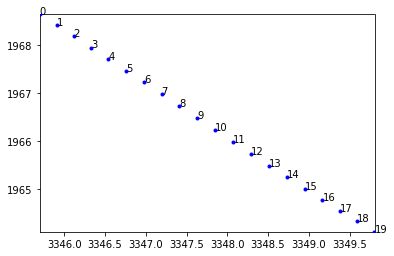

In [7]:
split_name = "train"
seq_id = 252
seq_path = f"{BASE_DIR}/data/datasets/argoverse/motion-forecasting/{split_name}/data/{seq_id}.csv"
df = pd.read_csv(seq_path, dtype={"TIMESTAMP": str})

obs_len = 20
pred_len = 30

RAW_DATA_FORMAT = {
    "TIMESTAMP": 0,
    "TRACK_ID": 1,
    "OBJECT_TYPE": 2,
    "X": 3,
    "Y": 4,
    "CITY_NAME": 5,
}

# Get social and map features for the agent

agent_track = df[df["OBJECT_TYPE"] == "AGENT"].values

agent_xy = agent_track[:,[RAW_DATA_FORMAT["X"],RAW_DATA_FORMAT["Y"]]].astype("float")

map_features_utils_instance = map_functions.MapFeaturesUtils()
# map_features_utils_instance.get_agent_velocity_and_acceleration(agent_xy,debug=True)
# map_features_utils_instance.get_agent_velocity_and_acceleration(agent_xy,filter="savgol",debug=True)
# map_features_utils_instance.get_agent_velocity_and_acceleration(agent_xy,filter="cubic_spline",debug=True)
# map_features_utils_instance.get_agent_velocity_and_acceleration(agent_xy,filter="savgol+cubic_spline",debug=True)
map_features_utils_instance.get_agent_velocity_and_acceleration(agent_xy,filter="least_squares",debug=True)

In [8]:
seq_path = f"{root_dir}/13606.csv"
viz = True

# Visualize sequence

start = time.time()
viz_sequence(afl.get(seq_path).seq_df, show=viz)
end = time.time()
print("Viz seq: ", end-start)

obs_len = 20
obs_origin = 20

data = dataset_utils.read_file(seq_path) 
origin_pos, city_name = dataset_utils.get_origin_and_city(data,obs_origin)

# Visualize candidate centerlines

agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]

start = time.time()
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, city_name, viz=viz)
end = time.time()
print("Candidate centerlines: ", end-start)

start = time.time()
candidate_centerlines = avm.get_candidate_centerlines_for_traj_custom(agent_obs_traj, city_name, viz=viz)
end = time.time()
print("Candidate centerlines custom: ", end-start)

# Visualize nearest centerline

start = time.time()
nearest_centerline = avm.get_nearest_centerline(np.array(origin_pos), city_name, visualize=viz)
end = time.time()
print("Nearest centerline: ", end-start)

# Visualize lane direction in the last observation frame

agent_traj = afl.get(seq_path).agent_traj
start = time.time()
lane_direction = avm.get_lane_direction(agent_traj[0], city_name, visualize=viz)
end = time.time()
print("Get lane direction: ", end-start)

13606

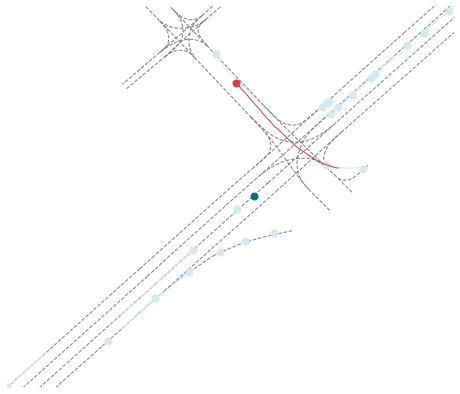

Viz seq:  7.508663892745972


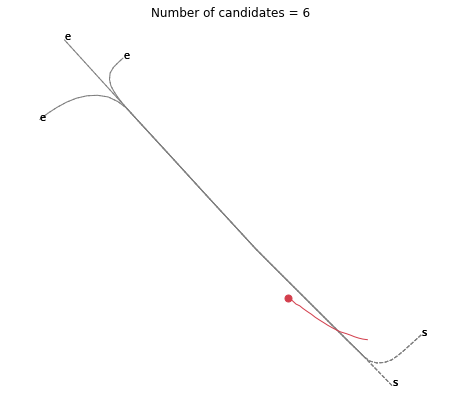

Candidate centerlines:  0.06867408752441406


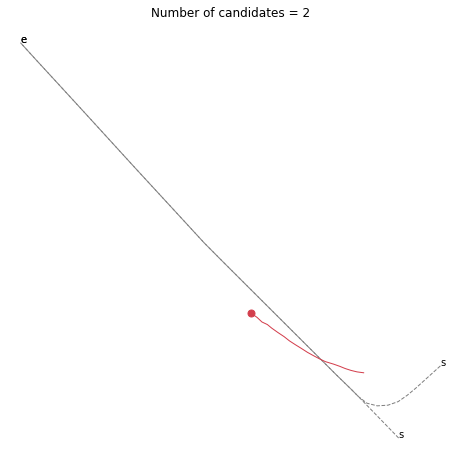

Candidate centerlines custom:  0.0564885139465332


/home/denso/anaconda3/envs/carlos_vsr_mapfe4mp/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


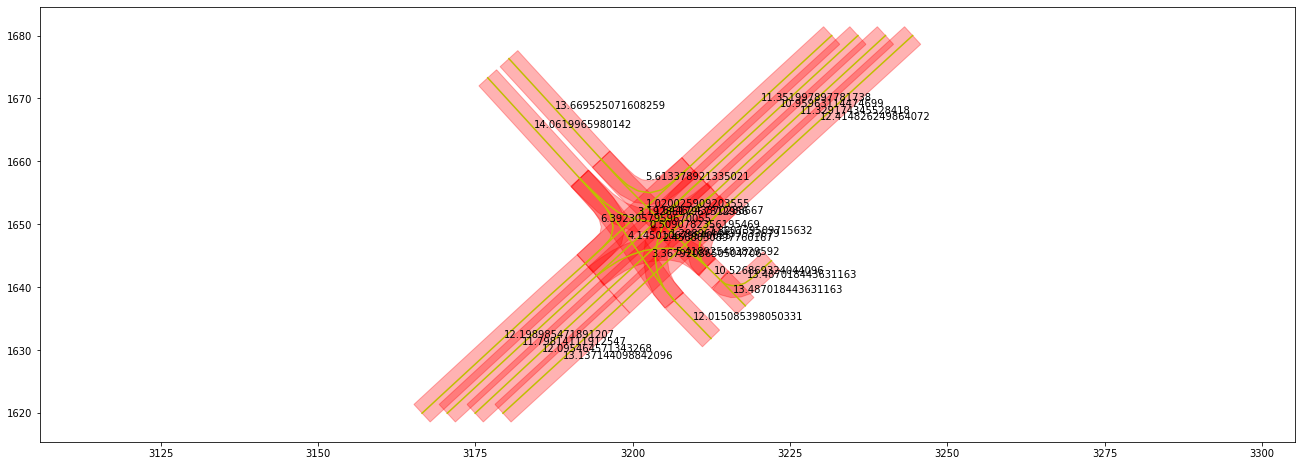

Nearest centerline:  0.22411537170410156


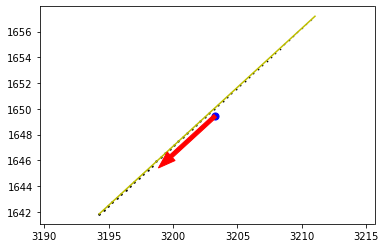

yaw:  -2.3999570973543616
Yaw:  -137.50741269087254
Get lane direction:  0.4046773910522461


In [17]:
seq_path = f"{root_dir}/2.csv"
viz = True

# Visualize sequence

start = time.time()
viz_sequence(afl.get(seq_path).seq_df, show=viz)
end = time.time()
print("Viz seq: ", end-start)

obs_len = 20
obs_origin = 20

data = dataset_utils.read_file(seq_path) 
origin_pos, city_name = dataset_utils.get_origin_and_city(data,obs_origin)

# Visualize candidate centerlines

agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]

start = time.time()
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, city_name, viz=viz)
end = time.time()
print("Candidate centerlines: ", end-start)

start = time.time()
candidate_centerlines = avm.get_candidate_centerlines_for_traj_custom(agent_obs_traj, city_name, viz=viz)
end = time.time()
print("Candidate centerlines custom: ", end-start)

# Visualize nearest centerline

start = time.time()
nearest_centerline = avm.get_nearest_centerline(np.array(origin_pos), city_name, visualize=viz)
end = time.time()
print("Nearest centerline: ", end-start)

# Visualize lane direction in the last observation frame

agent_traj = afl.get(seq_path).agent_traj
start = time.time()
lane_direction, confidence = avm.get_lane_direction(agent_traj[obs_len-1], city_name, visualize=viz)
yaw = math.atan2(lane_direction[1],lane_direction[0])
print("yaw: ", yaw)
print("Yaw: ", math.degrees(yaw))

end = time.time()
print("Get lane direction: ", end-start)

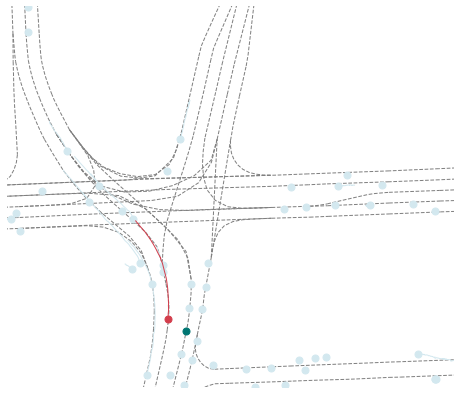

Viz seq:  7.358400821685791


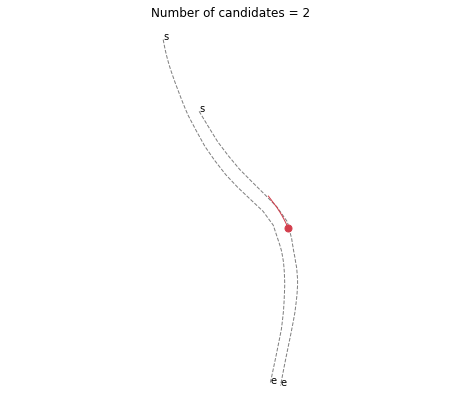

Candidate centerlines:  0.05509161949157715


/home/denso/anaconda3/envs/carlos_vsr_mapfe4mp/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


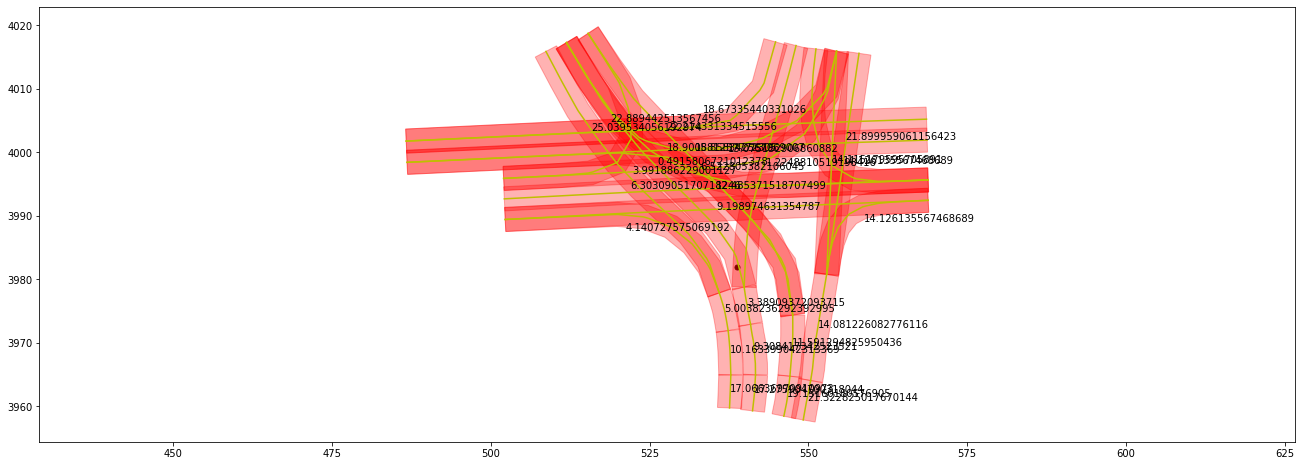

Nearest centerline:  0.23919367790222168


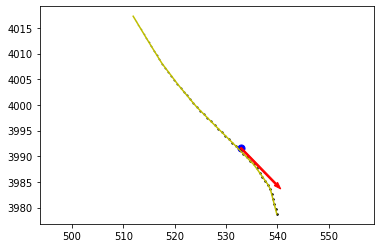

Get lane direction:  0.4093010425567627


In [6]:
seq_path = f"{root_dir}/4.csv"
viz = True

# Visualize sequence

start = time.time()
viz_sequence(afl.get(seq_path).seq_df, show=viz)
end = time.time()
print("Viz seq: ", end-start)

obs_len = 20
obs_origin = 20

data = dataset_utils.read_file(seq_path) 
origin_pos, city_name = dataset_utils.get_origin_and_city(data,obs_origin)

# Visualize candidate centerlines

agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
start = time.time()
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, city_name, viz=viz)
end = time.time()
print("Candidate centerlines: ", end-start)

# Visualize nearest centerline

start = time.time()
nearest_centerline = avm.get_nearest_centerline(np.array(origin_pos), city_name, visualize=viz)
end = time.time()
print("Nearest centerline: ", end-start)

# Visualize lane direction in the last observation frame

agent_traj = afl.get(seq_path).agent_traj
start = time.time()
lane_direction = avm.get_lane_direction(agent_traj[0], city_name, visualize=viz)
end = time.time()
print("Get lane direction: ", end-start)

In [9]:
# candidate_centerlines[0].shape
len(candidate_centerlines)

# agent_obs_traj
np.array(origin_pos)

array([ 205.83381422, 1532.52969298])

In [5]:
city_name

'PIT'

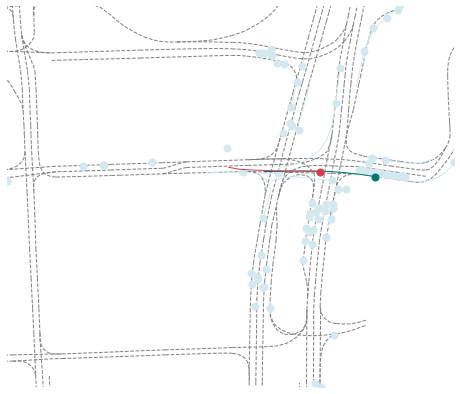

Viz seq:  7.969861745834351


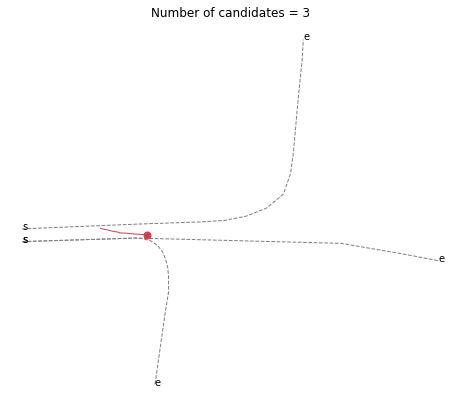

Candidate centerlines:  0.054201602935791016


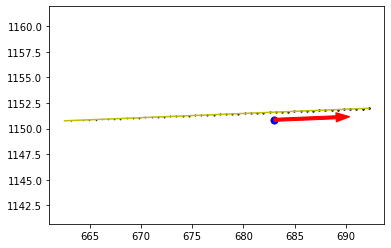

Get lane direction:  0.42394495010375977


In [5]:
seq_path = f"{root_dir}/18359.csv"
viz = True

# Visualize sequence

start = time.time()
viz_sequence(afl.get(seq_path).seq_df, show=viz)
end = time.time()
print("Viz seq: ", end-start)

obs_len = 20
obs_origin = 20

data = dataset_utils.read_file(seq_path) 
origin_pos, city_name = dataset_utils.get_origin_and_city(data,obs_origin)

# Visualize candidate centerlines

agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
start = time.time()
# candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, city_name, viz=viz)
end = time.time()
print("Candidate centerlines: ", end-start)

# Visualize lane direction in the last observation frame

agent_traj = afl.get(seq_path).agent_traj
start = time.time()
lane_direction = avm.get_lane_direction(agent_traj[0], city_name, visualize=viz)
end = time.time()
print("Get lane direction: ", end-start)

In [7]:
candidate_centerlines[0].shape

(50, 2)

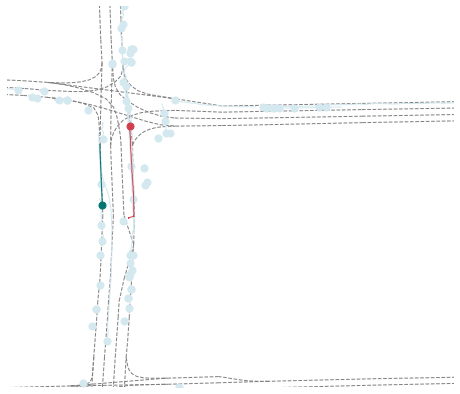

Viz seq:  8.7499361038208


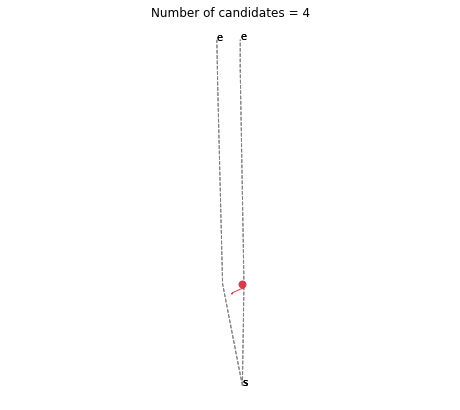

Candidate centerlines:  0.061635494232177734


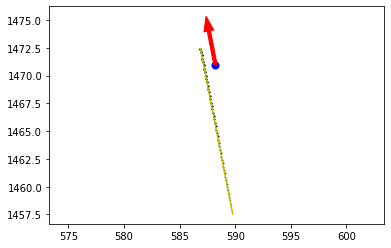

Get lane direction:  0.4422447681427002


In [3]:
seq_path = f"{root_dir}/422.csv"
viz = True

# Visualize sequence

start = time.time()
viz_sequence(afl.get(seq_path).seq_df, show=viz)
end = time.time()
print("Viz seq: ", end-start)

obs_len = 20
obs_origin = 20

data = dataset_utils.read_file(seq_path) 
origin_pos, city_name = dataset_utils.get_origin_and_city(data,obs_origin)

# Visualize candidate centerlines

agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
start = time.time()
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, city_name, viz=viz)
end = time.time()
print("Candidate centerlines: ", end-start)

# Visualize lane direction in the last observation frame

agent_traj = afl.get(seq_path).agent_traj
start = time.time()
lane_direction = avm.get_lane_direction(agent_traj[0], city_name, visualize=viz)
end = time.time()
print("Get lane direction: ", end-start)

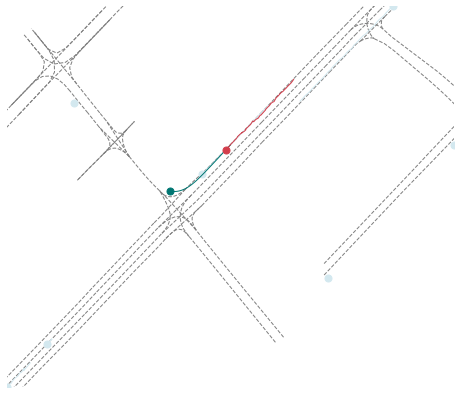

Viz seq:  7.000475883483887


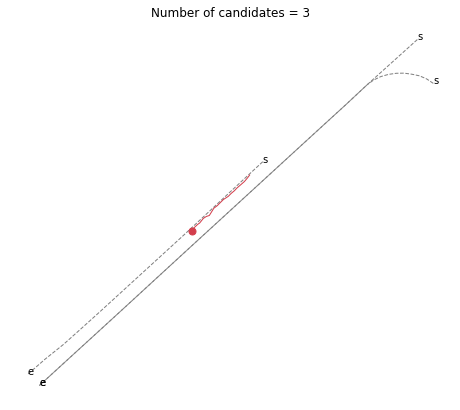

Candidate centerlines:  0.05938148498535156


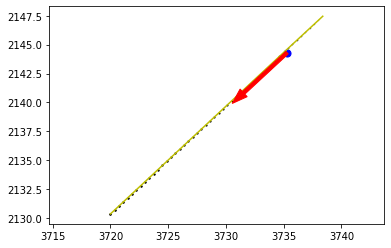

Get lane direction:  0.41574573516845703


In [56]:

seq_path = f"{root_dir}/7016.csv"
viz = True

# Visualize sequence

start = time.time()
viz_sequence(afl.get(seq_path).seq_df, show=viz)
end = time.time()
print("Viz seq: ", end-start)

obs_len = 20
obs_origin = 20

data = dataset_utils.read_file(seq_path) 
origin_pos, city_name = dataset_utils.get_origin_and_city(data,obs_origin)

# Visualize candidate centerlines

agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
start = time.time()
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, city_name, viz=viz)
end = time.time()
print("Candidate centerlines: ", end-start)

# Visualize lane direction in the last observation frame

agent_traj = afl.get(seq_path).agent_traj
start = time.time()
lane_direction = avm.get_lane_direction(agent_traj[0], city_name, visualize=viz)
end = time.time()
print("Get lane direction: ", end-start)

In [57]:
len(candidate_centerlines)

3

In [60]:
candidate_centerlines[2].shape

(20, 2)